In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

#### y = x2 + x +2

In [2]:
# Generating 1000 points from -10 to 10
x = np.linspace(-10,10,1000)
# Genrating the plot for f(x)
y = x**2 + x + 2
# Initializing the starting point and learning rate
x_init = np.random.choice(x)

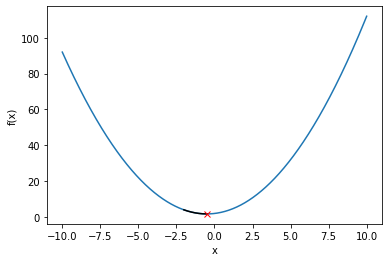

Value of x where f(x) takes it's minimum value is close to -0.5000000000000027


In [3]:
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('f(x)')
lr = 0.01
# Gradient descent algorithm
num_iter = 1800

def grad(x):
    return 2*x + 1

def double_diff(x):
    return 2        # stationary point is minima

def grad_desc(x_init,lr,num_iter = 1800):
    x = x_init
    num = 0
    traversed_data = {}
    while num < num_iter:
        traversed_data[x] = x**2 + x + 2
        x_updt =  x - (lr * grad(x))
        x = x_updt
        num += 1    
    return traversed_data

traversed_data = grad_desc(x_init,lr)
key,value = list(traversed_data.keys()),list(traversed_data.values())
plt.plot(key,value,'black')
plt.plot(key[-1],value[-1],'rx')
plt.show()
print(f'Value of x where f(x) takes it\'s minimum value is close to {key[-1]}')

In [4]:
print(f"Initial value of x is {x_init}")
CopyOfTheta = np.array([x_init])
length = len(CopyOfTheta)
# Gradient descent algorithm
def f(x):
    return x**2 + x + 2

def getThetaDelta():
    p = 0.5
    listRV = bernoulli.rvs(p,size = length)
    delta = np.copy(listRV)
    delta[listRV == 1] = 1
    delta[listRV == 0] = -1
    # print(f"New theta is {CopyOfTheta} and New delta is {delta}")
    return CopyOfTheta,delta

def spsa(a,A,alpha,c,gamma,burn_in,num_iter):
    traversed_points = []
    traversed_func = []
    total_iter = 0
    global CopyOfTheta
    for i in range(1, burn_in+1):
        theta, delta = getThetaDelta()
        traversed_points.append(theta)
        traversed_func.append(f(theta[0]))
        # print(f'theta and delta are {theta},{delta}')
        lr = 0.01
        curr_c = (c/(i**gamma))
        # print(f"lr = {lr} and curr_c = {curr_c}")
        gradient = (f(theta + curr_c*delta) - f(theta - curr_c*delta))/ (2*curr_c*delta)
        # print(f"gradient = {gradient}")
        theta = theta - lr * gradient
        CopyOfTheta = np.copy(theta)
        total_iter += 1
        # print(f"x = theta[0] = {theta[0]}")
    for k in range(1,num_iter - burn_in + 1):
        theta, delta = getThetaDelta()
        traversed_points.append(theta)
        traversed_func.append(f(theta[0]))
        # print(f'theta and delta are {theta},{delta}')
        lr = a/((k+A)**alpha)
        curr_c = (c/(k**gamma))
        # print(f"lr = {lr} and curr_c = {curr_c}")
        gradient = (f(theta + curr_c*delta) - f(theta - curr_c*delta))/ (2*curr_c*delta)
        # print(f"gradient = {gradient}")
        theta = theta - lr * gradient
        CopyOfTheta = np.copy(theta)
        total_iter += 1
        # print(f"x = theta[0] = {theta[0]}")
    print(f"final value of x is {theta[0]}")
    return np.array(traversed_points),np.array(traversed_func),total_iter

num_iter = 1800
burn_in = 1
key,value,total_iter = spsa(a = 0.05,A = 20,alpha = 0.3,c = 0.1,gamma = 0.3,num_iter = num_iter,burn_in = burn_in)

Initial value of x is -2.012012012012012
final value of x is -0.500000000005211


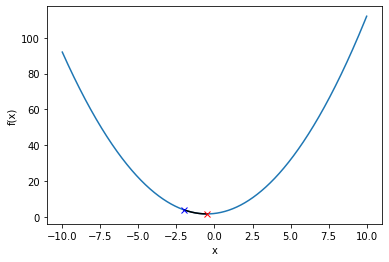

Value of x where f(x) takes it's minimum value is close to [-0.5]
value of x after burn_in iterations(1) is [-1.98177177]


In [5]:
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(key[:,0],value,'black')
plt.plot(key[-1],value[-1],'rx')
plt.plot(key[burn_in],value[burn_in],'bx')
plt.show()
print(f'Value of x where f(x) takes it\'s minimum value is close to {key[-1]}')
print(f'value of x after burn_in iterations({burn_in}) is {key[burn_in]}')

#### y = xsinx

In [6]:
# Generating 1000 points from -10 to 10
x = np.linspace(-10,10,1000)
# Genrating the plot for f(x)
y = x * np.sin(x)
# Initializing the starting point and learning rate
x_init = np.random.choice(x)

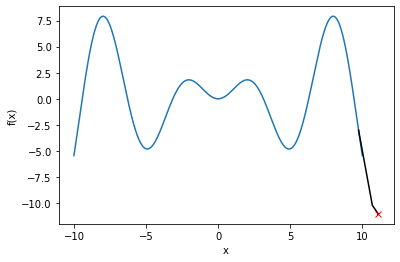

One of the local minima's to which our Gradient Descent converges is close to 11.085538406497022


In [7]:
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('f(x)')
lr = 0.1
# Gradient descent algorithm
iter = 1800
def loss(x):
    return (grad(x) ** 2) * double_diff(x) # double_diff(x) is used to know whether the stationary point in minima or maxima

def grad(x):
    return x * np.cos(x) + np.sin(x)

def double_diff(x):
    return 2 * np.cos(x) - x * np.sin(x) # stationary point can be positive or negative

def grad_desc(x_init,lr,display = False,iter = 100):
    x = x_init
    num = 0
    traversed_data = {}
    if display:
        while num < iter:
            x_updt =  x - (lr * grad(x))
            x = x_updt
            num += 1
        return loss(x)
    else:
        while num < iter:
            traversed_data[x] = x * np.sin(x)
            x_updt =  x - (lr * grad(x))
            x = x_updt
            num += 1
        return traversed_data

def display_obser():
    ls_lr = np.linspace(0,1,20)
    ls_x = np.random.choice(x,size = ls_lr.shape)
    ls_x = np.array(ls_x)
    ls_x,ls_lr = np.meshgrid(ls_x,ls_lr)
    loss_arr = grad_desc(ls_x,ls_lr,True,200)
    fig = plt.figure()
    ax = plt.axes(projection = '3d')
    ax.scatter3D(ls_x,ls_lr,loss_arr,cmap = 'viridis',c = loss_arr)
    ax.set_xlabel('starting point',linespacing = 3.3)
    ax.set_ylabel('learning rates',linespacing = 3.2)
    ax.set_zlabel('loss', linespacing = 3.0)
    ax.dist = 11
    plt.show()
    print(f'Start points when loss value is greater than 200\n {ls_x[loss_arr > 200]}\n')
    print(f'learning rates when loss value is greater than 200\n {ls_lr[loss_arr > 200]}')
    return

traversed_data = grad_desc(x_init,lr)
key,value = list(traversed_data.keys()),list(traversed_data.values())
plt.plot(key,value,'black')
plt.plot(key[-1],value[-1],'rx')
plt.show()
print(f'One of the local minima\'s to which our Gradient Descent converges is close to {key[-1]}')

In [8]:
print(f"Initial value of x is {x_init}")
CopyOfTheta = np.array([x_init])
length = len(CopyOfTheta)
# Gradient descent algorithm
def f(x):
    return x * np.sin(x)

def getThetaDelta():
    p = 0.5
    listRV = bernoulli.rvs(p,size = length)
    delta = np.copy(listRV)
    delta[listRV == 1] = 1
    delta[listRV == 0] = -1
    # print(f"New theta is {CopyOfTheta} and New delta is {delta}")
    return CopyOfTheta,delta

def spsa(a,A,alpha,c,gamma,burn_in,num_iter):
    traversed_points = []
    traversed_func = []
    total_iter = 0
    global CopyOfTheta
    for i in range(1, burn_in+1):
        theta, delta = getThetaDelta()
        traversed_points.append(theta)
        traversed_func.append(f(theta[0]))
        # print(f'theta and delta are {theta},{delta}')
        lr = 0.01
        curr_c = (c/(i**gamma))
        # print(f"lr = {lr} and curr_c = {curr_c}")
        gradient = (f(theta + curr_c*delta) - f(theta - curr_c*delta))/ (2*curr_c*delta)
        # print(f"gradient = {gradient}")
        theta = theta - lr * gradient
        CopyOfTheta = np.copy(theta)
        total_iter += 1
        # print(f"x = theta[0] = {theta[0]}")
    for k in range(1,num_iter - burn_in + 1):
        theta, delta = getThetaDelta()
        traversed_points.append(theta)
        traversed_func.append(f(theta[0]))
        # print(f'theta and delta are {theta},{delta}')
        lr = a/((k+A)**alpha)
        curr_c = (c/(k**gamma))
        # print(f"lr = {lr} and curr_c = {curr_c}")
        gradient = (f(theta + curr_c*delta) - f(theta - curr_c*delta))/ (2*curr_c*delta)
        # print(f"gradient = {gradient}")
        theta = theta - lr * gradient
        CopyOfTheta = np.copy(theta)
        total_iter += 1
        # print(f"x = theta[0] = {theta[0]}")
    print(f"final value of x is {theta[0]}")
    return np.array(traversed_points),np.array(traversed_func),total_iter

num_iter = 1800
burn_in = 1
key,value,total_iter = spsa(a = 0.05,A = 20,alpha = 0.3,c = 0.1,gamma = 0.3,num_iter = num_iter,burn_in = burn_in)

Initial value of x is 9.73973973973974
final value of x is 11.085535091933394


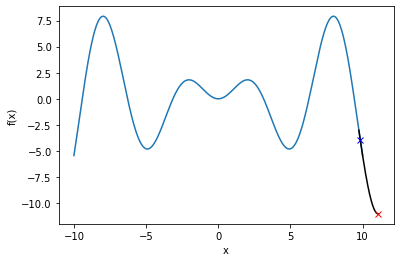

Value of x where f(x) takes it's minimum value is close to [11.08553509]
value of x after burn_in iterations(1) is [9.83527404]


In [9]:
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(key[:,0],value,'black')
plt.plot(key[-1],value[-1],'rx')
plt.plot(key[burn_in],value[burn_in],'bx')
plt.show()
print(f'Value of x where f(x) takes it\'s minimum value is close to {key[-1]}')
print(f'value of x after burn_in iterations({burn_in}) is {key[burn_in]}')

#### y = |x|

In [10]:
# Generating 1000 points from -10 to 10
x = np.linspace(-10,10,1000)
# Genrating the plot for f(x)
y = abs(x)
# Initializing the starting point and learning rate
x_init = np.random.choice(x)

In [11]:
print(f"Initial value of x is {x_init}")
CopyOfTheta = np.array([x_init])
length = len(CopyOfTheta)
# Gradient descent algorithm
def f(x):
    return abs(x)

def getThetaDelta():
    p = 0.5
    listRV = bernoulli.rvs(p,size = length)
    delta = np.copy(listRV)
    delta[listRV == 1] = 1
    delta[listRV == 0] = -1
    # print(f"New theta is {CopyOfTheta} and New delta is {delta}")
    return CopyOfTheta,delta

def spsa(a,A,alpha,c,gamma,burn_in,num_iter):
    traversed_points = []
    traversed_func = []
    total_iter = 0
    global CopyOfTheta
    for i in range(1, burn_in+1):
        theta, delta = getThetaDelta()
        traversed_points.append(theta)
        traversed_func.append(f(theta[0]))
        # print(f'theta and delta are {theta},{delta}')
        lr = 0.01
        curr_c = (c/(i**gamma))
        # print(f"lr = {lr} and curr_c = {curr_c}")
        gradient = (f(theta + curr_c*delta) - f(theta - curr_c*delta))/ (2*curr_c*delta)
        # print(f"gradient = {gradient}")
        theta = theta - lr * gradient
        CopyOfTheta = np.copy(theta)
        total_iter += 1
        # print(f"x = theta[0] = {theta[0]}")
    for k in range(1,num_iter - burn_in + 1):
        theta, delta = getThetaDelta()
        traversed_points.append(theta)
        traversed_func.append(f(theta[0]))
        # print(f'theta and delta are {theta},{delta}')
        lr = a/((k+A)**alpha)
        curr_c = (c/(k**gamma))
        # print(f"lr = {lr} and curr_c = {curr_c}")
        gradient = (f(theta + curr_c*delta) - f(theta - curr_c*delta))/ (2*curr_c*delta)
        # print(f"gradient = {gradient}")
        theta = theta - lr * gradient
        CopyOfTheta = np.copy(theta)
        total_iter += 1
        # print(f"x = theta[0] = {theta[0]}")
    print(f"final value of x is {theta[0]}")
    return np.array(traversed_points),np.array(traversed_func),total_iter

num_iter = 1800
burn_in = 1
key,value,total_iter = spsa(a = 0.05,A = 20,alpha = 0.3,c = 0.1,gamma = 0.3,num_iter = num_iter,burn_in = burn_in)

Initial value of x is 2.2122122122122114
final value of x is 3.2659994328356993e-19


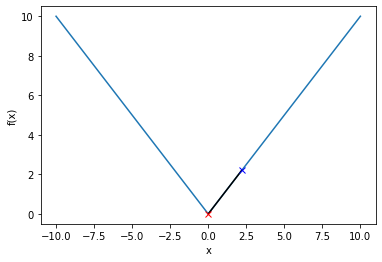

Value of x where f(x) takes it's minimum value is close to [3.26599943e-19]
value of x after burn_in iterations(1) is [2.20221221]


In [12]:
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(key[:,0],value,'black')
plt.plot(key[-1],value[-1],'rx')
plt.plot(key[burn_in],value[burn_in],'bx')
plt.show()
print(f'Value of x where f(x) takes it\'s minimum value is close to {key[-1]}')
print(f'value of x after burn_in iterations({burn_in}) is {key[burn_in]}')

#### y = |x-2| + |x+2|

In [13]:
# Generating 1000 points from -10 to 10
x = np.linspace(-10,10,1000)
# Genrating the plot for f(x)
y = abs(x-2) + abs(x+2)
# Initializing the starting point and learning rate
x_init = np.random.choice(x)

In [14]:
print(f"Initial value of x is {x_init}")
CopyOfTheta = np.array([x_init])
length = len(CopyOfTheta)

def f(x):
    return abs(x-2) + abs(x+2)

def getThetaDelta():
    p = 0.5
    listRV = bernoulli.rvs(p,size = length)
    delta = np.copy(listRV)
    delta[listRV == 1] = 1
    delta[listRV == 0] = -1
    # print(f"New theta is {CopyOfTheta} and New delta is {delta}")
    return CopyOfTheta,delta

def spsa(a,A,alpha,c,gamma,burn_in,num_iter):
    traversed_points = []
    traversed_func = []
    total_iter = 0
    global CopyOfTheta
    for i in range(1, burn_in+1):
        theta, delta = getThetaDelta()
        traversed_points.append(theta)
        traversed_func.append(f(theta[0]))
        # print(f'theta and delta are {theta},{delta}')
        lr = 0.01
        curr_c = (c/(i**gamma))
        # print(f"lr = {lr} and curr_c = {curr_c}")
        gradient = (f(theta + curr_c*delta) - f(theta - curr_c*delta))/ (2*curr_c*delta)
        # print(f"gradient = {gradient}")
        theta = theta - lr * gradient
        CopyOfTheta = np.copy(theta)
        total_iter += 1
        # print(f"x = theta[0] = {theta[0]}")
    for k in range(1,num_iter - burn_in + 1):
        theta, delta = getThetaDelta()
        traversed_points.append(theta)
        traversed_func.append(f(theta[0]))
        # print(f'theta and delta are {theta},{delta}')
        lr = a/((k+A)**alpha)
        curr_c = (c/(k**gamma))
        # print(f"lr = {lr} and curr_c = {curr_c}")
        gradient = (f(theta + curr_c*delta) - f(theta - curr_c*delta))/ (2*curr_c*delta)
        # print(f"gradient = {gradient}")
        theta = theta - lr * gradient
        CopyOfTheta = np.copy(theta)
        total_iter += 1
        # print(f"x = theta[0] = {theta[0]}")
    print(f"final value of x is {theta[0]}")
    return np.array(traversed_points),np.array(traversed_func),total_iter

num_iter = 1800
burn_in = 1
key,value,total_iter = spsa(a = 0.05,A = 20,alpha = 0.3,c = 0.1,gamma = 0.3,num_iter = num_iter,burn_in = burn_in)

Initial value of x is -4.874874874874875
final value of x is -1.9753811372260723


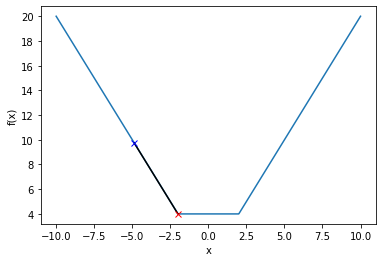

Value of x where f(x) takes it's minimum value is close to [-1.97538114]
value of x after burn_in iterations(1) is [-4.85487487]


In [15]:
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(key[:,0],value,'black')
plt.plot(key[-1],value[-1],'rx')
plt.plot(key[burn_in],value[burn_in],'bx')
plt.show()
print(f'Value of x where f(x) takes it\'s minimum value is close to {key[-1]}')
print(f'value of x after burn_in iterations({burn_in}) is {key[burn_in]}')

#### y = x2 + y2 + 2x + 2y

In [16]:
# Generate x,y 1000 data points from -10 to 10
x = np.linspace(-10,10,1000)
y = np.linspace(-10,10,1000)
# Plot the function f(x,y)
def f(x,y):
    return x**2 + y**2 + 2*x + 2*y
# Initialize the starting point
x_init = np.random.choice(x)
y_init = np.random.choice(y)

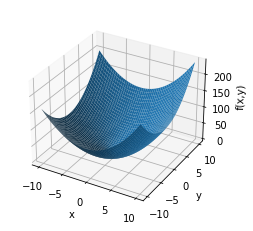

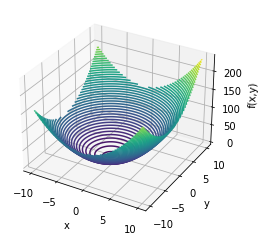

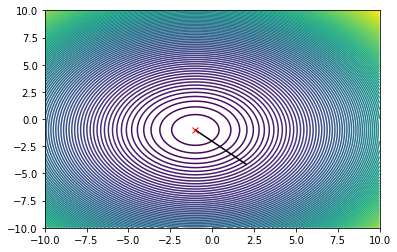


The value of x and y at which the function f(x,y) is minimum is close to (-0.9999999999999998, -1.0000000000000004)


In [17]:
X,Y = np.meshgrid(x,y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,f(X,Y))
ax.set_xlabel('x',linespacing = 3.3)
ax.set_ylabel('y', linespacing = 3.3)
ax.set_zlabel('f(x,y)', linespacing = 3.0)
ax.dist = 11
plt.show()

lr = 0.1
num_iter = 1800
# Using Gradient Descent
def loss(x,y):
    return (grad_x(x) ** 2) * (grad_y(y) ** 2)

def grad_x(x):
    return 2*x + 2

def grad_y(y):
    return 2*y + 2

def double_diff(x,y):
    return 2,2  # double derivatives w.r.t both x,y are positive. Stationary point can be either saddle point or minima

def grad_desc_3d(x_init,y_init,lr,num_iter = 1800):
    x = x_init
    y = y_init
    num = 0
    traversed_data_3d = {}
    while num < num_iter:
        traversed_data_3d[x] = y
        x_updt =  x - (lr * grad_x(x))
        y_updt = y - (lr * grad_y(y))
        x = x_updt
        y = y_updt
        num += 1
    return traversed_data_3d

traversed_data_3d = grad_desc_3d(x_init,y_init,lr)
fig2 = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X,Y,f(X,Y),50,cmap = 'viridis')
ax.set_xlabel('x',linespacing = 3.3)
ax.set_ylabel('y', linespacing = 3.3)
ax.set_zlabel('f(x,y)', linespacing = 3.0)
ax.dist = 10
plt.show()

fig3 = plt.figure()
ax = plt.axes()
ax.contour(X,Y,f(X,Y),100,cmap = 'viridis')
x_,y_ = zip(*traversed_data_3d.items())
ax.plot(x_,y_,'black')
ax.plot(x_[-1],y_[-1],'rx')
plt.show()

print(f'\nThe value of x and y at which the function f(x,y) is minimum is close to ({x_[-1]}, {y_[-1]})')

In [18]:
print(f"Initial value of x and y is ({x_init},{y_init})")
CopyOfTheta = np.array([x_init,y_init])
length = len(CopyOfTheta)

def getThetaDelta():
    p = 0.5
    listRV = bernoulli.rvs(p,size = length)
    delta = np.copy(listRV)
    delta[listRV == 1] = 1
    delta[listRV == 0] = -1
    # print(f"New theta is {CopyOfTheta} and New delta is {delta}")
    return CopyOfTheta,delta

def spsa(a,A,alpha,c,gamma,burn_in,num_iter):
    traversed_points = []
    traversed_func = []
    total_iter = 0
    global CopyOfTheta
    for i in range(1, burn_in+1):
        theta, delta = getThetaDelta()
        traversed_points.append(theta)
        traversed_func.append(f(theta[0],theta[1]))
        # print(f'theta and delta are {theta},{delta}')
        lr = 0.01
        curr_c = (c/(i**gamma))
        # print(f"lr = {lr} and curr_c = {curr_c}")
        gradient = (f(*(theta + curr_c*delta)) - f(*(theta - curr_c*delta)))/ (2*curr_c*delta)
        # print(f"gradient = {gradient}")
        theta = theta - lr * gradient
        CopyOfTheta = np.copy(theta)
        total_iter += 1
        # print(f"x = theta[0] = {theta[0]}")
    for k in range(1,num_iter - burn_in + 1):
        theta, delta = getThetaDelta()
        traversed_points.append(theta)
        traversed_func.append(f(theta[0],theta[1]))
        # print(f'theta and delta are {theta},{delta}')
        lr = a/((k+A)**alpha)
        curr_c = (c/(k**gamma))
        # print(f"lr = {lr} and curr_c = {curr_c}")
        gradient = (f(*(theta + curr_c*delta)) - f(*(theta - curr_c*delta)))/ (2*curr_c*delta)
        # print(f"gradient = {gradient}")
        theta = theta - lr * gradient
        CopyOfTheta = np.copy(theta)
        total_iter += 1
        # print(f"x = theta[0] = {theta[0]}")
    print(f"final value of x and y is ({theta[0]},{theta[1]})")
    return np.array(traversed_points),np.array(traversed_func),total_iter

num_iter = 1800
burn_in = 1
key,value,total_iter = spsa(a = 0.05,A = 20,alpha = 0.3,c = 0.1,gamma = 0.3,num_iter = num_iter,burn_in = burn_in)

Initial value of x and y is (2.0120120120120113,-4.134134134134134)
final value of x and y is (-0.9999999999846096,-1.0000000000155778)


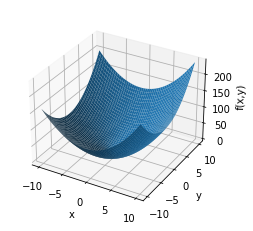

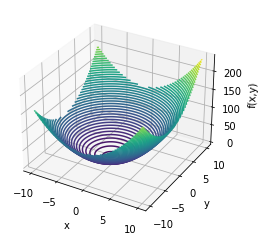

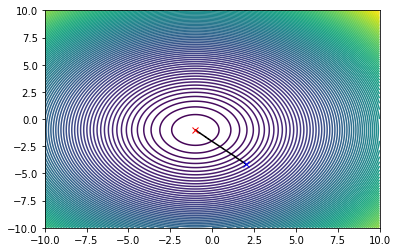

In [19]:
X,Y = np.meshgrid(x,y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,f(X,Y))
ax.set_xlabel('x',linespacing = 3.3)
ax.set_ylabel('y', linespacing = 3.3)
ax.set_zlabel('f(x,y)', linespacing = 3.0)
ax.dist = 11
plt.show()

fig2 = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X,Y,f(X,Y),50,cmap = 'viridis')
ax.set_xlabel('x',linespacing = 3.3)
ax.set_ylabel('y', linespacing = 3.3)
ax.set_zlabel('f(x,y)', linespacing = 3.0)
ax.dist = 10
plt.show()

fig3 = plt.figure()
ax = plt.axes()
ax.contour(X,Y,f(X,Y),100,cmap = 'viridis')
ax.plot(key[:,0],key[:,1],'black')
ax.plot(key[:,0][burn_in],key[:,1][burn_in],'bx')
ax.plot(key[:,0][-1],key[:,1][-1],'rx')
plt.show()